In [1]:
import numpy as np
import pandas as pd

In [2]:
data = pd.read_csv('data/insurance.csv')

In [3]:
# melihat beberapa data awal
data.head()

# mengecek ukuran data
data.shape

# informasi tentang data
data.info()

# deskripsi data
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [4]:
data['sex'] = data['sex'].map({'female': 0, 'male': 1})

data['smoker'] = data['smoker'].map({'yes': 1, 'no': 0})

C:\Users\izam\AppData\Local\Temp\ipykernel_16132\962750111.py:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), cmap="YlGnBu", annot=True)


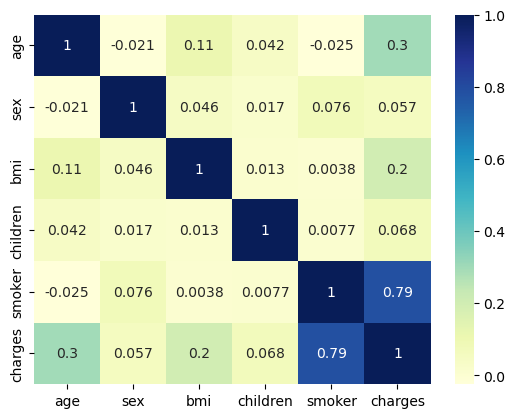

In [5]:
# import library untuk visualisasi
import matplotlib.pyplot as plt
import seaborn as sns

sns.heatmap(data.corr(), cmap="YlGnBu", annot=True)
plt.show()

In [6]:
# Membuat variabel bebas X dan Y, dengan asumsi mengambil X dari Age, Smoker
X1 = data['age']
X2 = data['smoker']
Y = data['charges']

In [7]:
# Pembagian data latih dan data uji dengan proporsi 7:3
from sklearn.model_selection import train_test_split

# Memisahkan data menjadi data latih dan data uji dengan perbandingan 7:3
X1_train, X1_test, X2_train, X2_test, Y_train, Y_test = train_test_split(X1, X2, Y, test_size=0.3, random_state=42)

# X1_train: Fitur Age untuk data latih
# X1_test: Fitur Age untuk data uji
# X2_train: Fitur BMI untuk data latih
# X2_test: Fitur BMI untuk data uji
# Y_train: Variabel dependen (Charges) untuk data latih
# Y_test: Variabel dependen (Charges) untuk data uji

In [8]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

# Melakukan scaling pada variabel "age" dan "bmi" dalam data latih
X1_train_scaled = scaler.fit_transform(X1_train.values.reshape(-1, 1))

# Melakukan scaling pada variabel "age" dan "bmi" dalam data uji
X1_test_scaled = scaler.transform(X1_test.values.reshape(-1, 1))

# Hasilnya adalah X1_train_scaled, X2_train_scaled, X1_test_scaled, X2_test_scaled

R-squared: 0.74123
Mean Squared Error (MSE): 0.25877
Mean Absolute Error (MAE): 0.00003


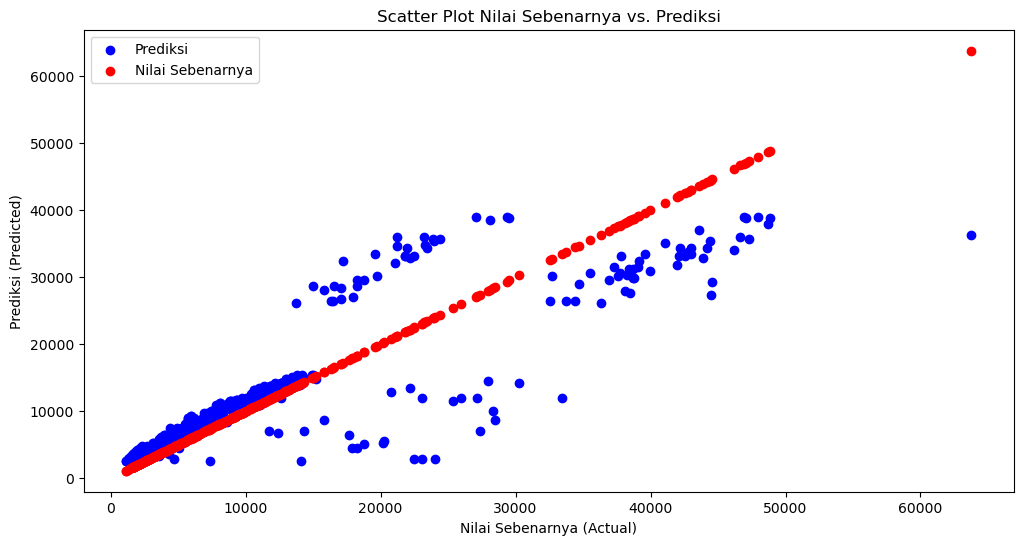

In [9]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# X1_train_scaled, X2_train_scaled, X3_train (fitur-fitur data latih)
# X1_test_scaled, X2_test_scaled, X3_test (fitur-fitur data uji)
# Y_train, Y_test (variabel dependen)

# Membuat model Multiple Linear Regression
model = LinearRegression()

# Melatih model pada data latih
X_train = np.column_stack((X1_train_scaled, X2_train))
model.fit(X_train, Y_train)

# Melakukan prediksi pada data uji
X_test = np.column_stack((X1_test_scaled, X2_test))
Y_pred = model.predict(X_test)

# Evaluasi model
r2 = r2_score(Y_test, Y_pred)
mse = mean_squared_error(Y_test, Y_pred)
mae = mean_absolute_error(Y_test, Y_pred)

# Normalized MSE (MSE yang telah dinormalisasi)
normalized_mse = mse / np.var(Y_test)

# Normalized MAE (MAE yang telah dinormalisasi)
normalized_mae = mae / np.var(Y_test)

# Menampilkan hasil evaluasi
print(f'R-squared: {r2:.5f}')
print(f'Mean Squared Error (MSE): {normalized_mse:.5f}')
print(f'Mean Absolute Error (MAE): {normalized_mae:.5f}')

# Visualisasi data relevan
plt.figure(figsize=(12, 6))
plt.scatter(Y_test, Y_pred, color='blue', label='Prediksi')
plt.scatter(Y_test, Y_test, color='red', label='Nilai Sebenarnya')
plt.xlabel("Nilai Sebenarnya (Actual)")
plt.ylabel("Prediksi (Predicted)")
plt.title("Scatter Plot Nilai Sebenarnya vs. Prediksi")
plt.legend()
plt.show()

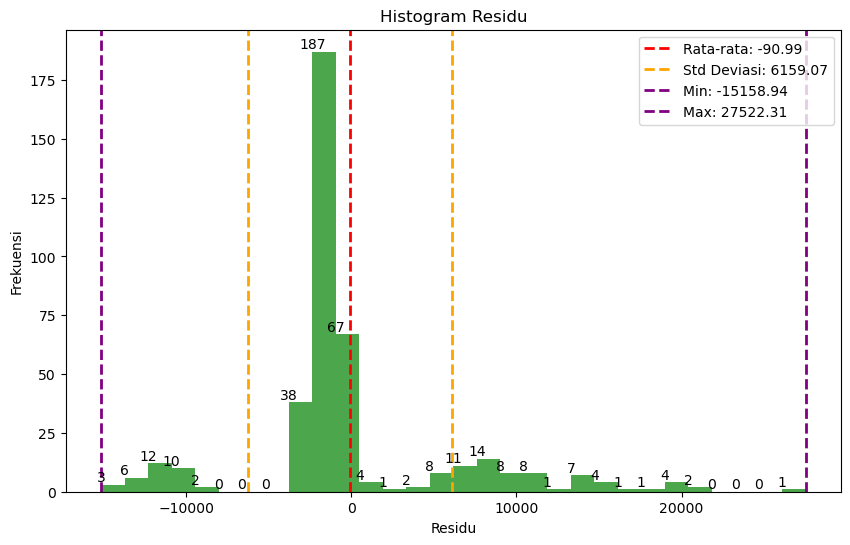

In [10]:
# Menghitung residu
residuals = Y_test - Y_pred

# Membuat histogram dengan informasi tambahan
plt.figure(figsize=(10, 6))
plt.hist(residuals, bins=30, color='green', alpha=0.7)

# Menghitung statistik residu
mean_residual = np.mean(residuals)
std_residual = np.std(residuals)
min_residual = np.min(residuals)
max_residual = np.max(residuals)

# Menampilkan statistik pada plot
plt.axvline(mean_residual, color='red', linestyle='dashed', linewidth=2, label=f"Rata-rata: {mean_residual:.2f}")
plt.axvline(mean_residual + std_residual, color='orange', linestyle='dashed', linewidth=2, label=f"Std Deviasi: {std_residual:.2f}")
plt.axvline(mean_residual - std_residual, color='orange', linestyle='dashed', linewidth=2)
plt.axvline(min_residual, color='purple', linestyle='dashed', linewidth=2, label=f"Min: {min_residual:.2f}")
plt.axvline(max_residual, color='purple', linestyle='dashed', linewidth=2, label=f"Max: {max_residual:.2f}")

# Menambahkan label dan judul
plt.xlabel("Residu")
plt.ylabel("Frekuensi")
plt.title("Histogram Residu")

# Menampilkan legenda
plt.legend()

# Menampilkan jumlah data dalam setiap interval (bin)
hist, bins = np.histogram(residuals, bins=30)
for i in range(len(hist)):
    plt.text(bins[i] + 0.02, hist[i], str(hist[i]), va='bottom', ha='center')

# Menampilkan plot histogram
plt.show()

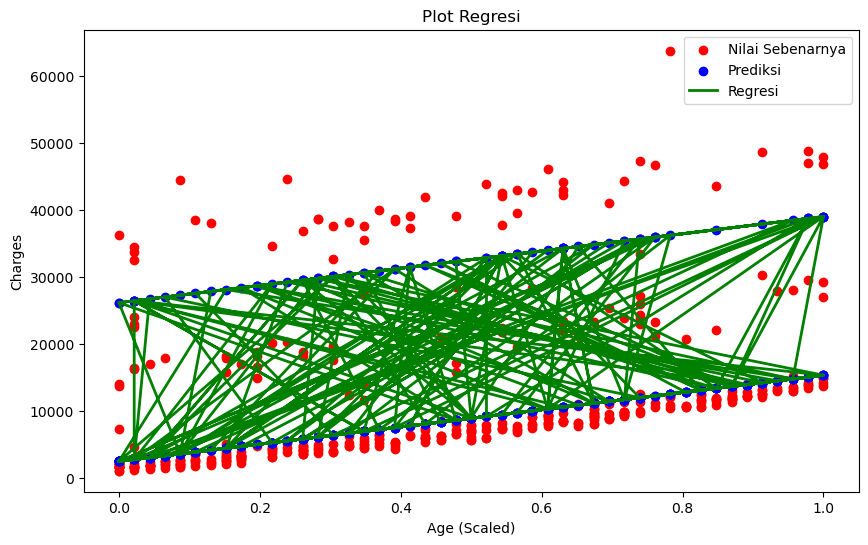

In [11]:
plt.figure(figsize=(10, 6))
plt.scatter(X1_test_scaled, Y_test, color='red', label='Nilai Sebenarnya')
plt.scatter(X1_test_scaled, Y_pred, color='blue', label='Prediksi')
plt.plot(X1_test_scaled, Y_pred, color='green', linewidth=2, label='Regresi')
plt.xlabel("Age (Scaled)")
plt.ylabel("Charges")
plt.title("Plot Regresi")
plt.legend()
plt.show()


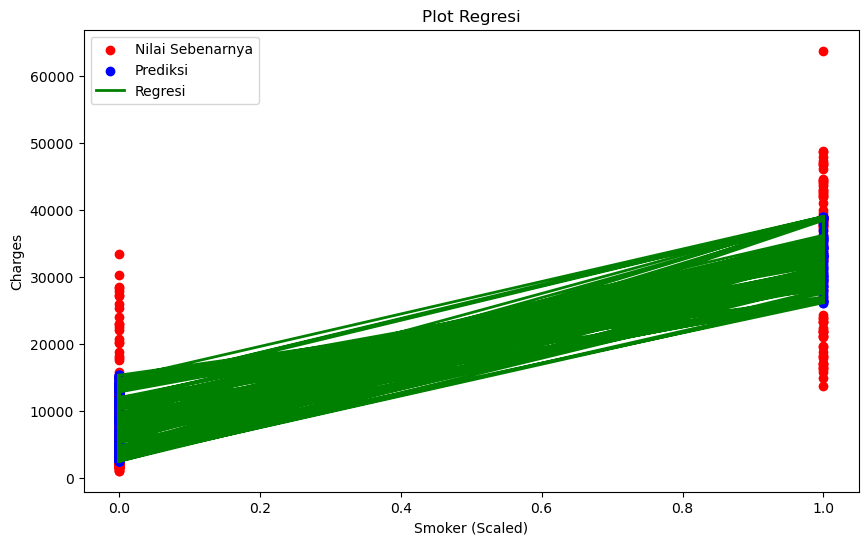

In [12]:
plt.figure(figsize=(10, 6))
plt.scatter(X2_test, Y_test, color='red', label='Nilai Sebenarnya')
plt.scatter(X2_test, Y_pred, color='blue', label='Prediksi')
plt.plot(X2_test, Y_pred, color='green', linewidth=2, label='Regresi')
plt.xlabel("Smoker (Scaled)")
plt.ylabel("Charges")
plt.title("Plot Regresi")
plt.legend()
plt.show()
